<a href="https://colab.research.google.com/github/Gabrielasants7/Portfolio-Ciencia-de-Dados/blob/main/EDA_VINHOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ANÁLISE EXPLORATÓRIA DE DADOS ( VINHOS)




ONDE ENCONTRAR ESSE CONJUNTO DE DADOS https://archive.ics.uci.edu/ml/datasets/wine+quality

# 1. SOBRE
O conjunto de dados , contém informações sobre várias propriedades dos vinhos. Cada vinho tem um rótulo de qualidade associado a ele, O rótulo está no intervalo de 0 a 10.


# 2. OBJETIVO
Um dos fatores contribuintes que me fizeram utilizar o conjunto de dados de vinhos , Foi eu ser Enófila . Consequetemente , como objetivo dessa análise exploratória é acerca da qualidade dos vinhos. O que contribui para um vinho de qualidade ?
Irei responder essa pergunta aqui , Espero que você não pule nenhuma etapa dessa análise ,  E vamos descobrir juntos esse mistério .

# 3. CARREGANDO AS BIBLIOTECAS 

In [1]:
#Carregando as bibliotecas 
%matplotlib inline
import seaborn as sns 
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import pandas as pd

#Modelagem

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score 

# 4. INICIANDO 


In [2]:
#Carregando o dataset
from google.colab import drive
vinhos = pd.read_csv("/content/drive/MyDrive/archive (1).zip")
vinhos.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
#CHECANDO AS COLUNAS
vinhos.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

#      5. DICIONÁRIO DAS VARIÁVEIS

Fixed acidity: Indica a quantidade de ácido tartárico no vinho e é medida em g/dm 3 .


Volatile acidity: Indica a quantidade de ácido acético no vinho, É medido em g/dm 3 .



Citric acid: Indica a quantidade de ácido cítrico no vinho,Também é medido em g/dm 3 .



Residual sugar: Indica a quantidade de açúcar que resta no vinho após o processo de fermentação, Também é medido em g/dm 3.


chlorides :



Free sulfur dioxide: Mede a quantidade de dióxido de enxofre (SO 2 ) na forma livre, Também é medido em g/dm 3 .


Total sulfur dioxide: Mede a quantidade total de SO 2 no vinho. Este produto químico funciona como um agente antioxidante e antimicrobiano.



Density: Indica a densidade do vinho e é medida em g/dm 3 .



pH: Indica o valor do pH do vinho, A faixa de valor está entre 0 e 14,0, o que indica acidez muito alta, e 14 indica acidez básica.



Sulphates: Indica a quantidade de sulfato de potássio no vinho. Também é medido em g/dm 3 .




Alcohol: Indica o teor alcoólico do vinho.




Quality: indica a qualidade do vinho, que varia de 1 a 10. Aqui, quanto maior o valor, melhor o vinho.


#6.  LIMPEZA

In [4]:
#Vendo os tipos dos dados 
vinhos.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
#OBSERVANDO SE HÁ DUPLICADAS
vinhos.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

In [6]:
#REMOVENDO ÁS DUPLICADAS
vinhos = vinhos.drop_duplicates()


In [7]:
#OBSERVANDO SE HÁ DADOS NULOS
vinhos.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,False,False,False,False,False,False,False,False,False,False,False,False
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
#estatística descritiva
vinhos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# 7. ESTATÍSTICA DESCRITIVA

A estatística descritiva trata da formulação de resumos simples de dados para que possam ser claramente entendidos, Irei utilizar as medidas de tendência central . Isso é , A inclusão de : mean, median, e mode. (Média , Mediana , Modo).

*A média,  É um número em torno do qual as variáveis ​​contínuas observadas são distribuídas. É o resultado da divisão da soma dos números pelo número de inteiros no conjunto de dados.*


A mediana,  É o valor que permite dividir uma série numérica, ordenada em duas partes de um mesmo número de elementos.

O modo é o número inteiro que aparece o número máximo de vezes no conjunto de dados. Acontece que é o valor mais representado de qualquer variável numa população .


Quartil ,  É um tipo de quantil . O primeiro quartil (Q1) é definido como o número médio entre o menor número e a mediana do conjunto de dados . O segundo quartil (Q2) é a mediana dos dados . O terceiro quartil (Q3) é o valor médio entre a mediana e o valor mais alto do conjunto de dados .




Desvio padrão , É o indicador utilizado para medir a dispersão de uma série estatística quantitativa. 


A Kurtose ,  É uma medida estatística usada para descrever a distribuição .





In [9]:
# variância do conjunto de dados usando a função var() 
variância=vinhos.var() 
print(variância) 




fixed acidity              3.017134
volatile acidity           0.033500
citric acid                0.038235
residual sugar             1.828752
chlorides                  0.002438
free sulfur dioxide      109.145456
total sulfur dioxide    1116.157653
density                    0.000003
pH                         0.024036
sulphates                  0.029127
alcohol                    1.170866
quality                    0.678281
dtype: float64


In [10]:
# variância da coluna específica 
var_quality=vinhos.loc[:,"quality"].var() 
print(var_quality)

0.6782807249114343


In [11]:
#vamos obter a assimetria 
vinhos.skew()

fixed acidity           0.941041
volatile acidity        0.729279
citric acid             0.312726
residual sugar          4.548153
chlorides               5.502487
free sulfur dioxide     1.226579
total sulfur dioxide    1.540368
density                 0.044778
pH                      0.232032
sulphates               2.406505
alcohol                 0.859841
quality                 0.192407
dtype: float64

In [12]:
# kurtose da coluna específica 
sk_quality=vinhos.loc[:,"quality"].kurt() 
print(sk_quality)

0.3402560880620915


#8.  ANÁLISE EXPLORATÓRIA
  
  Primeiramente, começarei explorando as colunas mais correlacionadas . Segundamente, irei comparar duas colunas diferentes e observar .

  Começarei com a **quality** .

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


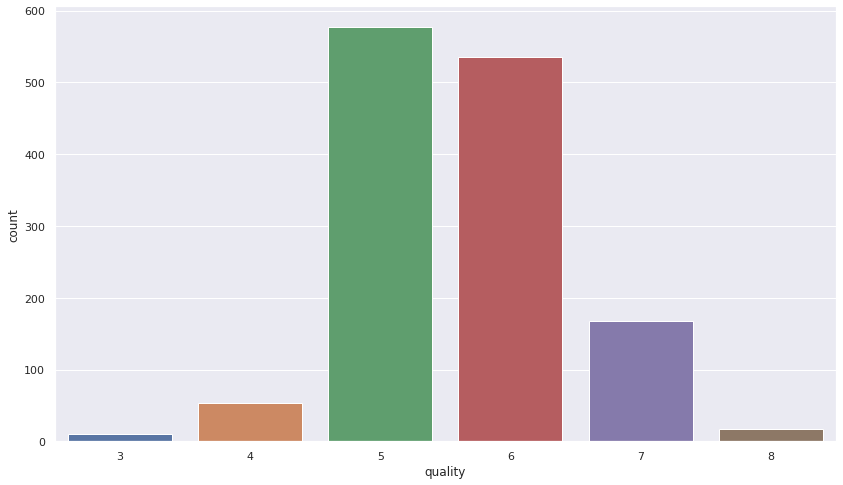

In [13]:
sns.set(rc={'figure.figsize': (14, 8)}) 
sns.countplot(vinhos['quality'])

A saída indica que a maioria dos vinhos é de qualidade média, a maioria dos vinhos tintos pertence ao grupo com rótulos de qualidade  5 e 6 . 

# 9. ENCONTRANDO COLUNAS CORRELACIONADAS 

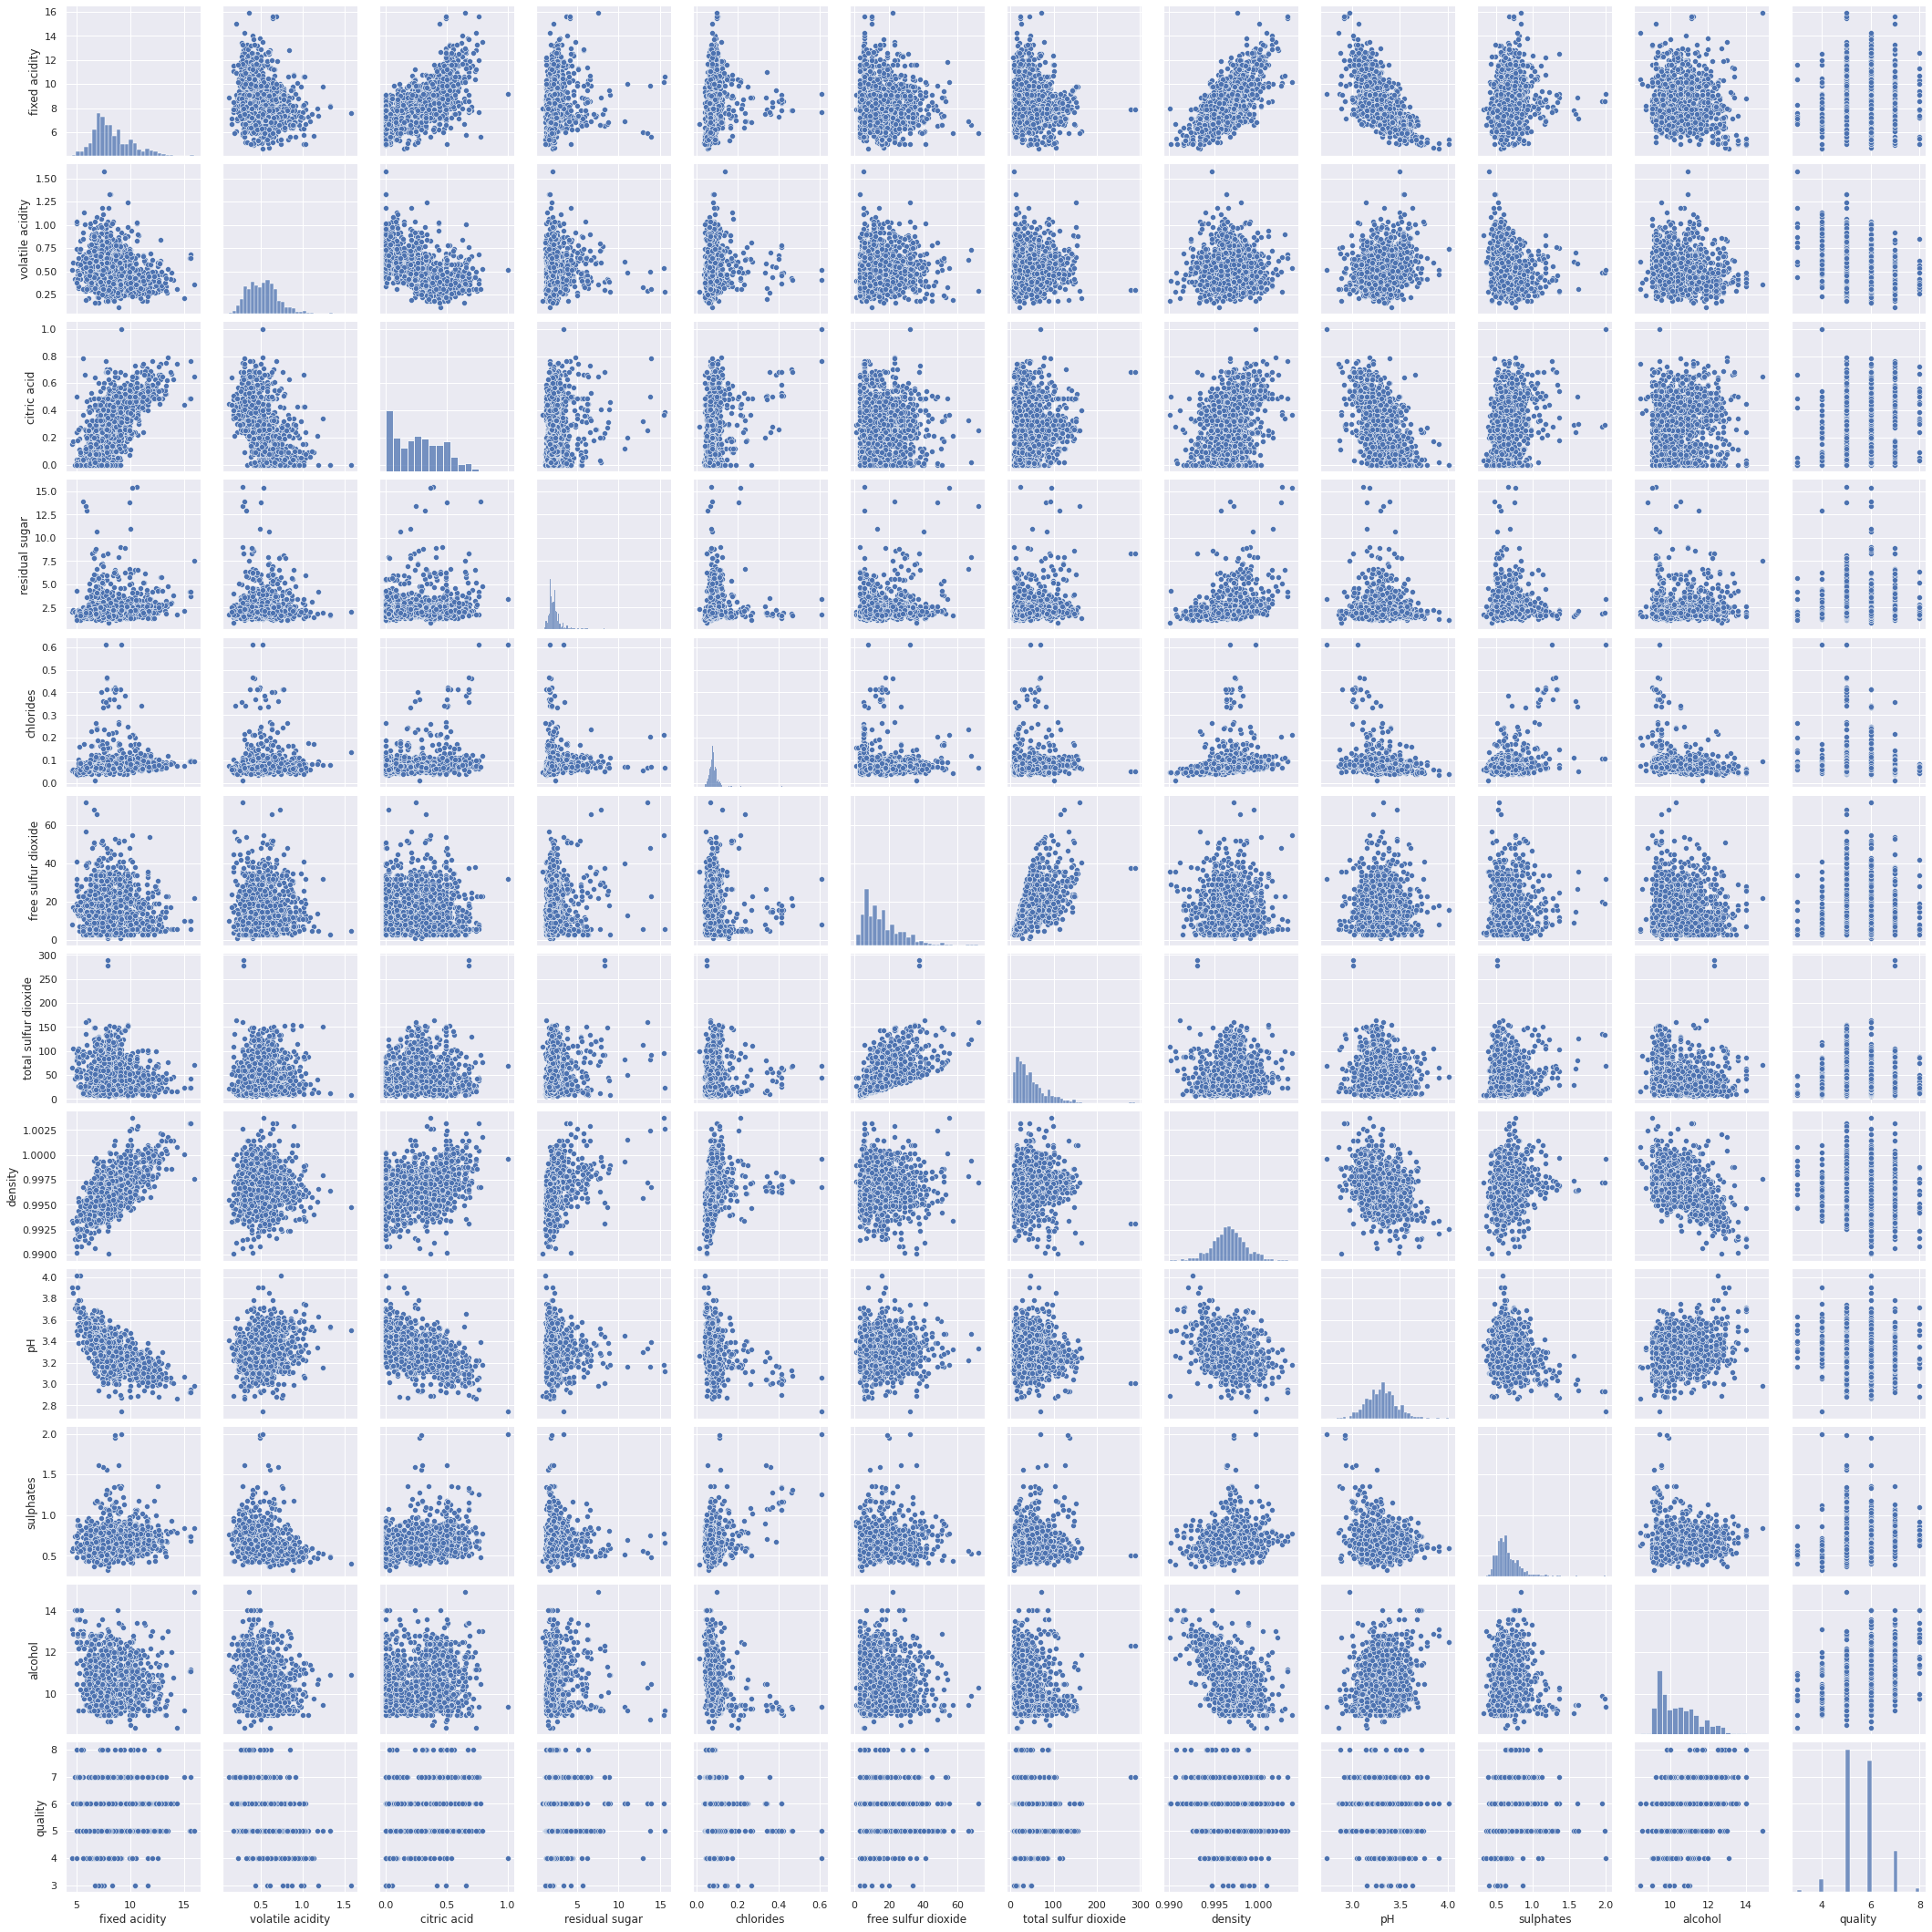

In [14]:
sns.pairplot(vinhos)

 Existe uma correlação negativa da acidez com o pH. Da mesma forma, existe uma correlação negativa entre a porcentagem de álcool e a densidade. Além disso, você pode ver exatamente quais colunas têm uma correlação positiva ou negativa com outras colunas. No entanto, como não há números , pode ser um pouco tendencioso interpretar os resultados. Por exemplo, examine a correlação entre as colunas para a acidez fixa e a acidez volátil. O gráfico pode ser de alguma forma simétrico. No entanto, você pode argumentar que há alguns pontos esparsos no lado direito do gráfico, portanto, há uma correlação levemente negativa. Aqui, meu ponto é, sem qualquer número quantificável específico, é difícil dizer. Esta é a razão pela qual podemos usar o Mapa de calor .

# 10. MAPA DE CALOR

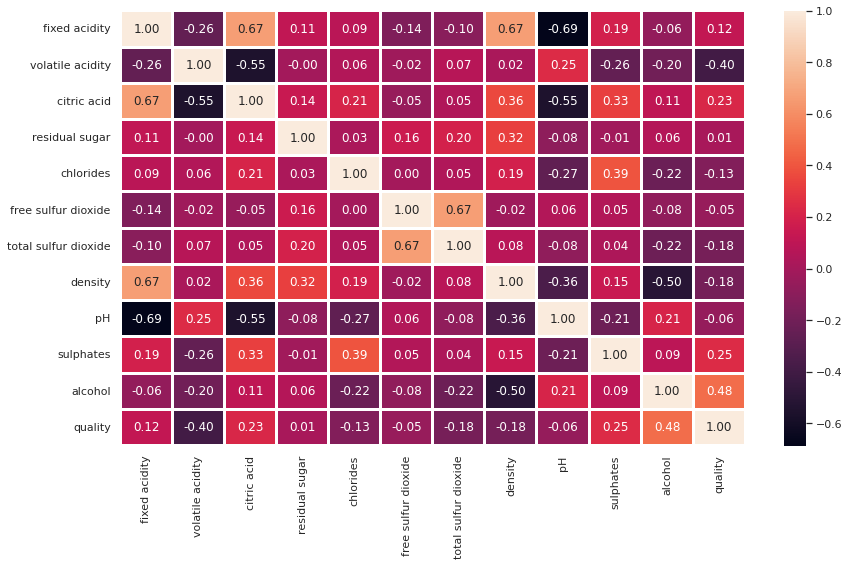

In [15]:
sns.heatmap(vinhos.corr(), annot=True, fmt='.2f', linewidths=2)

 Como  o meu destaque é na coluna de qualidade, irei pontuar correlações observadas apartir do mapa de calor .


✔  O álcool está positivamente correlacionado com a qualidade do vinho tinto.

✔  O álcool tem uma correlação positiva fraca com o valor do pH.

✔  O ácido cítrico e a densidade têm uma forte correlação positiva com a acidez fixa.

✔ O pH tem correlação negativa com densidade, acidez fixa, ácido cítrico e sulfatos.


# 11. Como a concentração de álcool é distribuída em relação à qualidade do vinho ?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


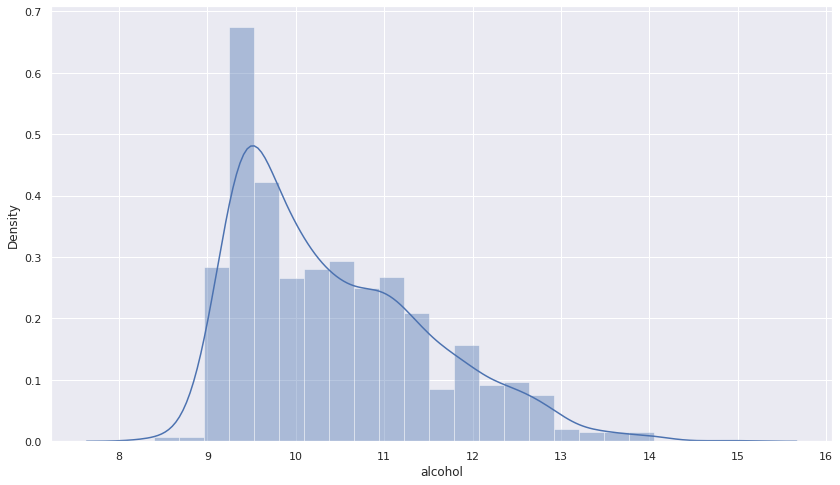

In [16]:
sns.distplot(vinhos['alcohol'])

É possível afirmar que a distribuição do álcool, é positivamente enviesada com a qualidade do vinho tinto.

# 12. ÁLCOOL X QUALIDADE 

Agora irei ver como a qualidade do vinho varia em relação à concentração de álcool, utilizarei o boxplot.

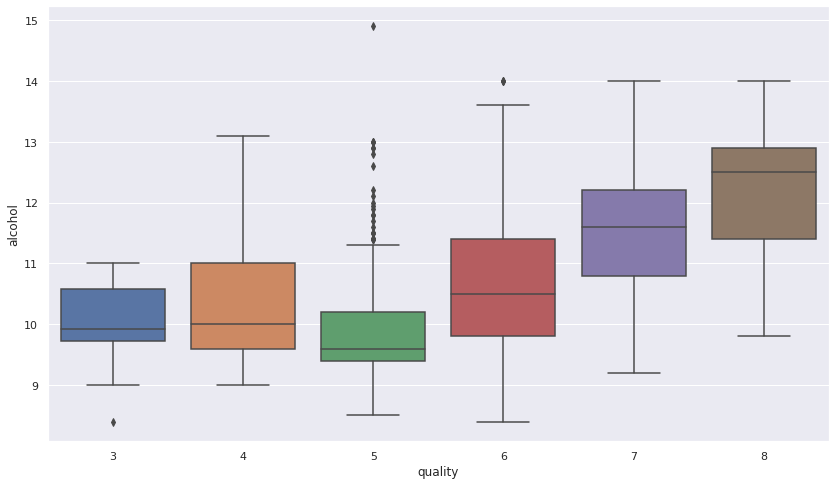

In [17]:
sns.boxplot(x='quality', y='alcohol', data = vinhos)

Temos alguns outliers , em torno da  qualidade  do vinho 5 e 6 , irei remover logo abaixo .

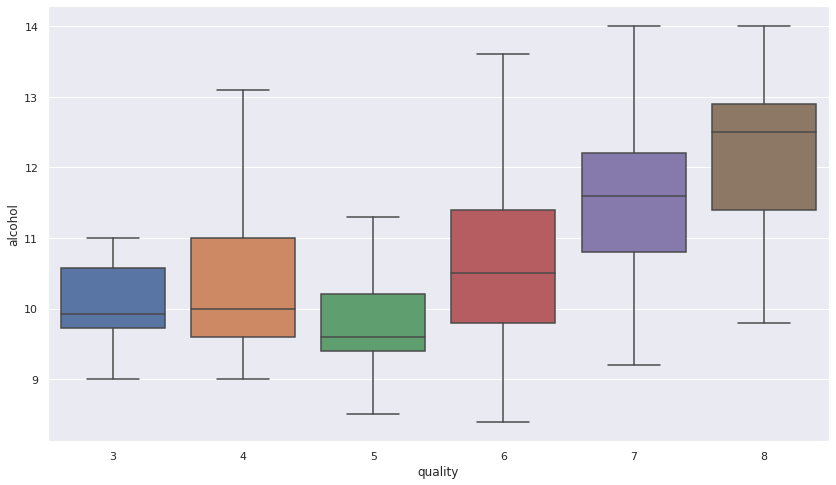

In [18]:
sns.boxplot(x='quality', y='alcohol', data = vinhos, showfliers=False)

Algo interessante a comentar é que vinhos com maior teor alcoólico são melhores avaliados. Vinhos com mais de 13% de teor alcoólico tem por volta de avaliação acima de 7 (boa). Alguns valores mais extremos mostram isso.

## 13. Qualidade x total sulfur dioxide

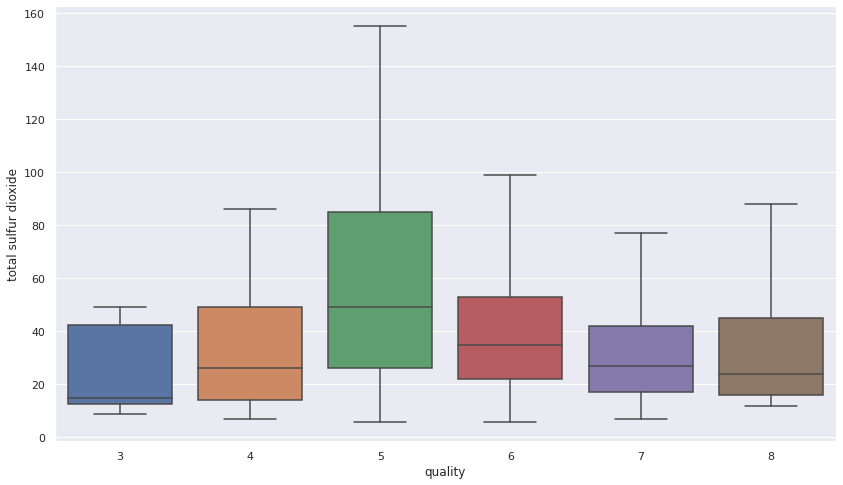

In [19]:
sns.boxplot(x='quality', y='total sulfur dioxide', data = vinhos, showfliers=False)

O dióxido de enxofre ou SO2 ,  é usado em toda a indústria alimentícia, pois é uma maneira comprovada de proteger itens perecíveis contra oxidação.
Esse aditivo consiste em preservar o frescor do vinho , Vinhos com qualidade entre 5 , 6 , tendem a ter uma concentraçao maior do aditivo .

## 14. Qualidade x Acidez cítrica

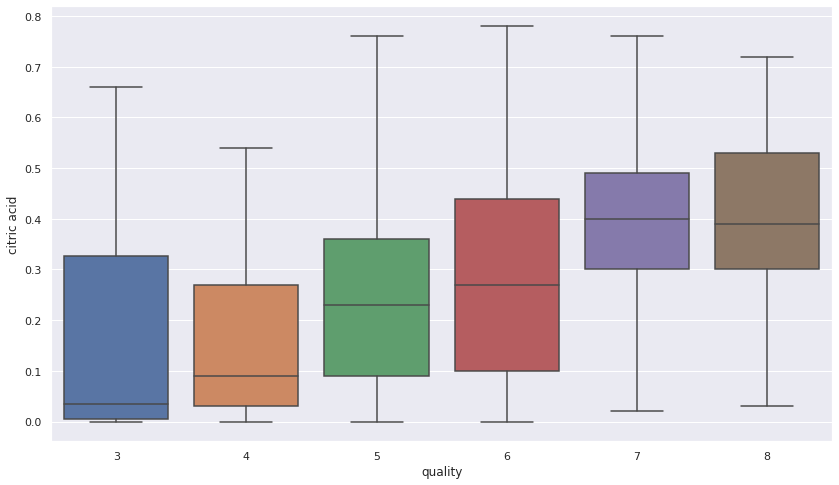

In [20]:
sns.boxplot(x='quality', y='citric acid', data = vinhos, showfliers=False)

Vinhos medianos é de melhores qualidades,  tendem a serem mais cítricos .



##15. Álcool x Densidade 

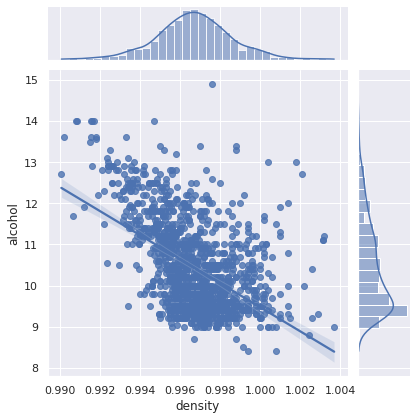

In [21]:
sns.jointplot(x='density',y='alcohol',data=vinhos, kind='reg')


# 16. ÁLCOOL X PH 

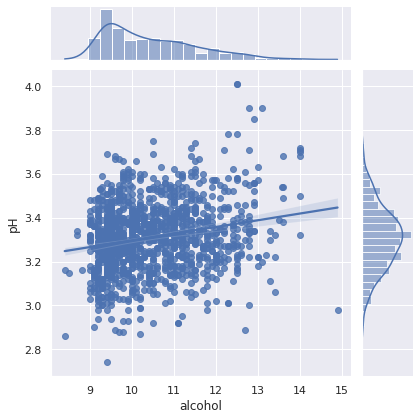

In [22]:
sns.jointplot(x='alcohol',y='pH',data=vinhos, kind='reg')

O álcool tem uma relação fraca , porém é uma relação positiva aos valores de pH. Além disso, a linha de regressão é representada ilustrando a correlação entre elas.

# 17. Correlação de Pearson
O coeficiente de correlação de Pearson , Pode ser usado para resumir a força da relação linear entre duas amostras de dados. 

In [23]:
#quantificando a correlação usando Pearson 

def get_correlation(column1, column2, df):
  pearson_corr, p_value = pearsonr(df[column1], df[column2])
  print("Correlation between {} and {} is {}".format(column1, column2, pearson_corr))
  print("P-value of this correlation is {}".format(p_value))


In [24]:
get_correlation('alcohol','pH', vinhos)

Correlation between alcohol and pH is 0.2134175140389692
P-value of this correlation is 1.8337195596302406e-15


# 18. INSIGHTS OBTIDOS ATRAVÉS DA ANÁLISE ACIMA 
Vocês lembram do que eu fiquei de responder através dessa análise exploratória ?
Irei refrescar a memória de vocês ... 
O que contribui para um vinho de qualidade ?

**Respondendo a pergunta** 

Em síntese , Baseado na análise acima é possível afirmar que alguns fatores principais estão relacionadas a qualidade do vinho sendo elas : 
alcohol
0.52

volatile acidity
0.40

sulfur dioxide
0.27



Irei comentar um pouco dessas características abaixo . 


**O álcool,** É o coração do vinho, Ao mesmo tempo que contribui para a textura e viscosidade do vinho, o álcool também desempenha um papel importante no aroma.  Um vinho doce terá um nível mais alto de açúcar residual, enquanto um vinho seco terá todos os seus açúcares convertidos em álcool durante a fermentação.


Muitas vezes confundido com uma alta concentração de álcool, vinhos de alta acidez são muitas vezes azedos .  É possível afirmar que um vinho de qualidade está interligado a uma acidez volátil , Ou seja quanto maior essa acidez,  maior é a deterioração no sabor. Mas o que é **acidez volátil**  ?

 **A acidez volátil (AV)**, É uma medida dos ácidos voláteis (ou gasosos) do vinho. O ácido volátil primário no vinho é o ácido acético, que também é o ácido primário associado ao cheiro e sabor do vinagre.
 O alto teor de açúcar, por exemplo, pode mascarar os cheiros derivados da acidez volátil, apesar de o AV estar normalmente mais presente em vinhos doces do que em estilos mais secos.



**O sulfur dioxide  (SO2 para abreviar)** , O  Seu destaque deriva de sua capacidade de desempenhar várias funções cruciais, Preserva a frescura e o carácter frutado do vinho graças às propriedades antioxidantes, antimicrobianas e anti-enzimáticas. Não há nenhum outro aditivo disponível para os vinicultores que possa desempenhar sozinho todas essas funções, SO2 é necessário para fazer vinhos de alta qualidade que podem resistir ao teste do tempo .

 




#19. PRÉ- PROCESSAMENTO

O PRÉ-PROCESSAMENTO irá consistir em : Codificação(LabelEncoder) ,  Separação dos dados 

codificarei os valores categóricos para a coluna . Desse modo,  os valores baixos sejam alterados para 0, os valores médios sejam alterados para 1 e os valores altos sejam alterados para 2.

In [25]:
#Codificando os valores categóricos 
quality = LabelEncoder()

vinhos['quality'] = quality.fit_transform(vinhos['quality'])

Agora, irei dividir o conjunto de dados, em um conjunto de treinamento e teste. 

In [26]:
#separando os dados entre x e y 
x = vinhos.drop('quality',axis=1)
y= vinhos['quality']

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y)
# View the different shapes of the training and test datasets
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1019, 11), (340, 11), (1019,), (340,))

In [28]:
# x = vinhos.drop('quality',axis=1)
# y = vinhos['quality']

In [29]:
#Dividindo o conjunto de dados 
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [30]:
models=[LogisticRegression(),
        LinearSVC(),
        SVC(kernel='rbf'),
        KNeighborsClassifier(),
        RandomForestClassifier(),
        DecisionTreeClassifier(),
        GradientBoostingClassifier(),
        GaussianNB()]

model_names=['LogisticRegression','LinearSVM','rbfSVM', 'KNearestNeighbors', 'RandomForestClassifier', 'DecisionTree', 'GradientBoostingClassifier', 'GaussianNB']

##20. PROCESSAMENTO

Ao invés de construir os modelos individualmente, farei um loop ,  e avaliarei a precisão . 


**Classificadores utilizados**


◀ [Support vector machines (SVMs)](https://scikit-learn.org/stable/modules/svm.html)

◀ [Regressão logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

◀ [KNearest Neighbors](https://scikit-learn.org/stable/modules/neighbors.html)

◀[ floresta aleatória](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

◀ [Decision Trees](https://scikit-learn.org/stable/modules/tree.html)

◀ [GradientBoosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

◀ [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)

In [31]:
#Modelagem
acc=[]
eval_acc={}

for model in range(len(models)):
    classification_model=models[model]
    classification_model.fit(x_train,y_train)
    pred=classification_model.predict(x_test)
    acc.append(accuracy_score(pred,y_test))
     
eval_acc={'Modelling Algorithm':model_names,'Accuracy':acc}
eval_acc

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


{'Modelling Algorithm': ['LogisticRegression',
  'LinearSVM',
  'rbfSVM',
  'KNearestNeighbors',
  'RandomForestClassifier',
  'DecisionTree',
  'GradientBoostingClassifier',
  'GaussianNB'],
 'Accuracy': [0.5529411764705883,
  0.4970588235294118,
  0.49411764705882355,
  0.4411764705882353,
  0.5705882352941176,
  0.47058823529411764,
  0.5676470588235294,
  0.5117647058823529]}

# 21.  Visualizando a precisão

In [32]:
acc_table=pd.DataFrame(eval_acc)
acc_table = acc_table.sort_values(by='Accuracy', ascending=[False])
acc_table

,Modelling Algorithm,Accuracy
4,RandomForestClassifier,0.570588
6,GradientBoostingClassifier,0.567647
0,LogisticRegression,0.552941
7,GaussianNB,0.511765
1,LinearSVM,0.497059
2,rbfSVM,0.494118
5,DecisionTree,0.470588
3,KNearestNeighbors,0.441176


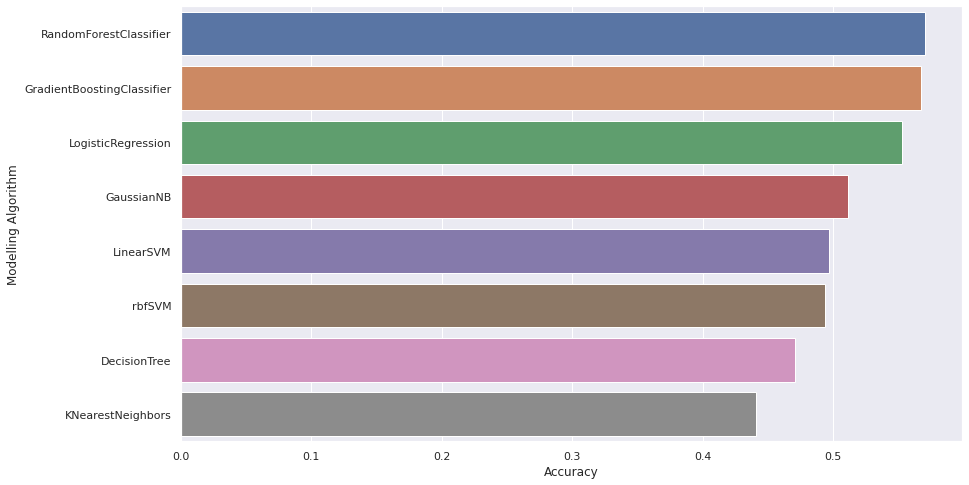

In [33]:
sns.barplot(y='Modelling Algorithm',x='Accuracy',data=acc_table)


In [34]:
#Hiperparâmetros regressão logística
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

In [35]:
# Configurarando 
np.random.seed(42)

# Importando RandomizedSearchCV from sklearn's model_selection
from sklearn.model_selection import RandomizedSearchCV

# Configurando uma instância de RandomizedSearchCV com um estimador LogisticRegression(),
rs_log_reg = RandomizedSearchCV(estimator=LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=5,
                                verbose=True)


rs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [36]:
# Encontre os melhores parâmetros da instância RandomizedSearchCV usando o atributo best_params_
rs_log_reg.score(x_test, y_test)

0.55

# Avaliação do modelo classificador
Tentamos encontrar os melhores hiperparâmetros em nosso modelo usando RandomizedSearchCV e até agora só avaliamos nosso modelo usando a função score() que retorna a precisão. Mas quando se trata de classificação, você provavelmente desejará usar mais algumas métricas de avaliação, incluindo:



[Matriz de confusão](https://) - Compara os valores previstos com os valores verdadeiros de forma tabular, se 100% correto, todos os valores da matriz serão do canto superior esquerdo para o canto inferior direito (linha de diagnóstico).


[Validação cruzada ](https://)- divide seu conjunto de dados em várias partes e treina e testa seu modelo em cada parte e avalia o desempenho como uma média.


[Precisão ](https://)- Proporção de verdadeiros positivos sobre o número total de amostras. Maior precisão leva a menos falsos positivos.

[Recall](https://) - Proporção de verdadeiros positivos sobre o número total de verdadeiros positivos e falsos positivos. Maior recall leva a menos falsos negativos.

[Pontuação F1](https://) - Combina precisão e recall em uma métrica. 1 é o melhor, 0 é o pior.

[Relatório de classificação](https://) - O Sklearn possui uma função interna chamada classificação_report(), que retorna algumas das principais métricas de classificação, como precisão, recall e pontuação f1.

[Curva ROC ](https://)- Receiver Operating Characterisitc é um gráfico da taxa de verdadeiros positivos versus a taxa de falsos positivos.

[Area Under Curve (AUC) ](https://) - A área abaixo da curva ROC. Um modelo perfeito atinge uma pontuação de 1,0.

In [37]:
clf = LogisticRegression(solver="liblinear", C=0.23357214690901212)

# 
clf.fit(x_train, y_train);

In [38]:

from sklearn.metrics import confusion_matrix, classification_report


from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.metrics import plot_roc_curve

In [39]:
y_preds = clf.predict(x_test)

In [40]:
confusion_matrix(y_test, y_preds)

array([[  0,   0,   1,   0,   0],
       [  0,   0,  10,   5,   0],
       [  0,   0, 104,  38,   0],
       [  0,   0,  64,  79,   1],
       [  0,   0,   4,  34,   0]])

In [41]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        15
           2       0.57      0.73      0.64       142
           3       0.51      0.55      0.53       144
           4       0.00      0.00      0.00        38

    accuracy                           0.54       340
   macro avg       0.21      0.26      0.23       340
weighted avg       0.45      0.54      0.49       340



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 22. Conclusão 
Qual modelo teve o melhor desempenho?

RandomForestClassifier, Em seguida o modelo que teve o melhor desempenho foi , LogisticRegression . 
Com valores bem parecidos .
